In [1]:
## Data manapulation
import pandas as pd
import numpy as np

# Data visualize
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
train = pd.read_csv(r'../Poverty/Data/train.csv')
test = pd.read_csv(r'../Poverty/Data/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


There are 9k rows approx and 143 columns, with all kinds of data types
Lets change some setting options for better visualization of the data frame

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


Test has more number of rows, we will look at it later

In [5]:
pd.options.display.max_columns = 150

In [6]:
train.select_dtypes(include=np.int64).shape[1]

130

In [7]:
train.select_dtypes(include=np.float).shape[1]

8

In [8]:
train.select_dtypes(include=object).shape[1]

5

Text(0, 0.5, 'Count')

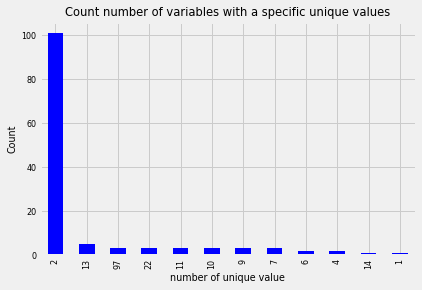

In [9]:
## First deal with the numerical variable
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 8
plt.rcParams['patch.edgecolor'] = 'k'


train.select_dtypes(np.int64).nunique().value_counts().plot(kind='bar', color = 'b')

plt.title('Count number of variables with a specific unique values')
plt.xlabel('number of unique value')
plt.ylabel('Count')

In [10]:
train.select_dtypes(np.int64).nunique().value_counts()

2     101
13      5
97      3
22      3
11      3
10      3
9       3
7       3
6       2
4       2
14      1
1       1
dtype: int64

There are 102 columns with boolean variables, these informations are on household level, boolean values on indivisual level needs to be aggregated

In [11]:
train.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


In [12]:
train.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

There are 4 unique values in target variables, lets plot contuinous variables (float varaibles) w.r.t target variables

In [15]:
## Plot indivisual graphs
train.select_dtypes(np.float).columns

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')

In [16]:
from collections import OrderedDict

colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'black'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


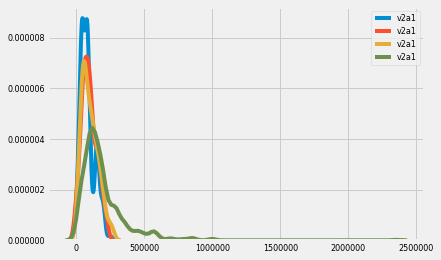

In [17]:
sns.kdeplot(train.loc[train['Target'] == 1, 'v2a1'])
sns.kdeplot(train.loc[train['Target'] == 2, 'v2a1'])
sns.kdeplot(train.loc[train['Target'] == 3, 'v2a1'])
sns.kdeplot(train.loc[train['Target'] == 4, 'v2a1'])



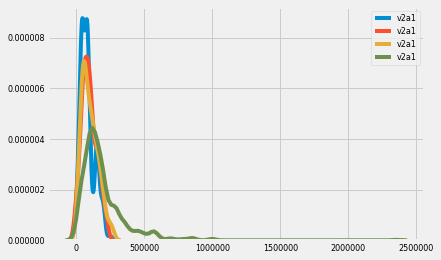

In [18]:
for poverty_level, c in colors.items():
    sns.kdeplot(train.loc[train['Target']== poverty_level , 'v2a1'])

C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda\envs\nlp\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


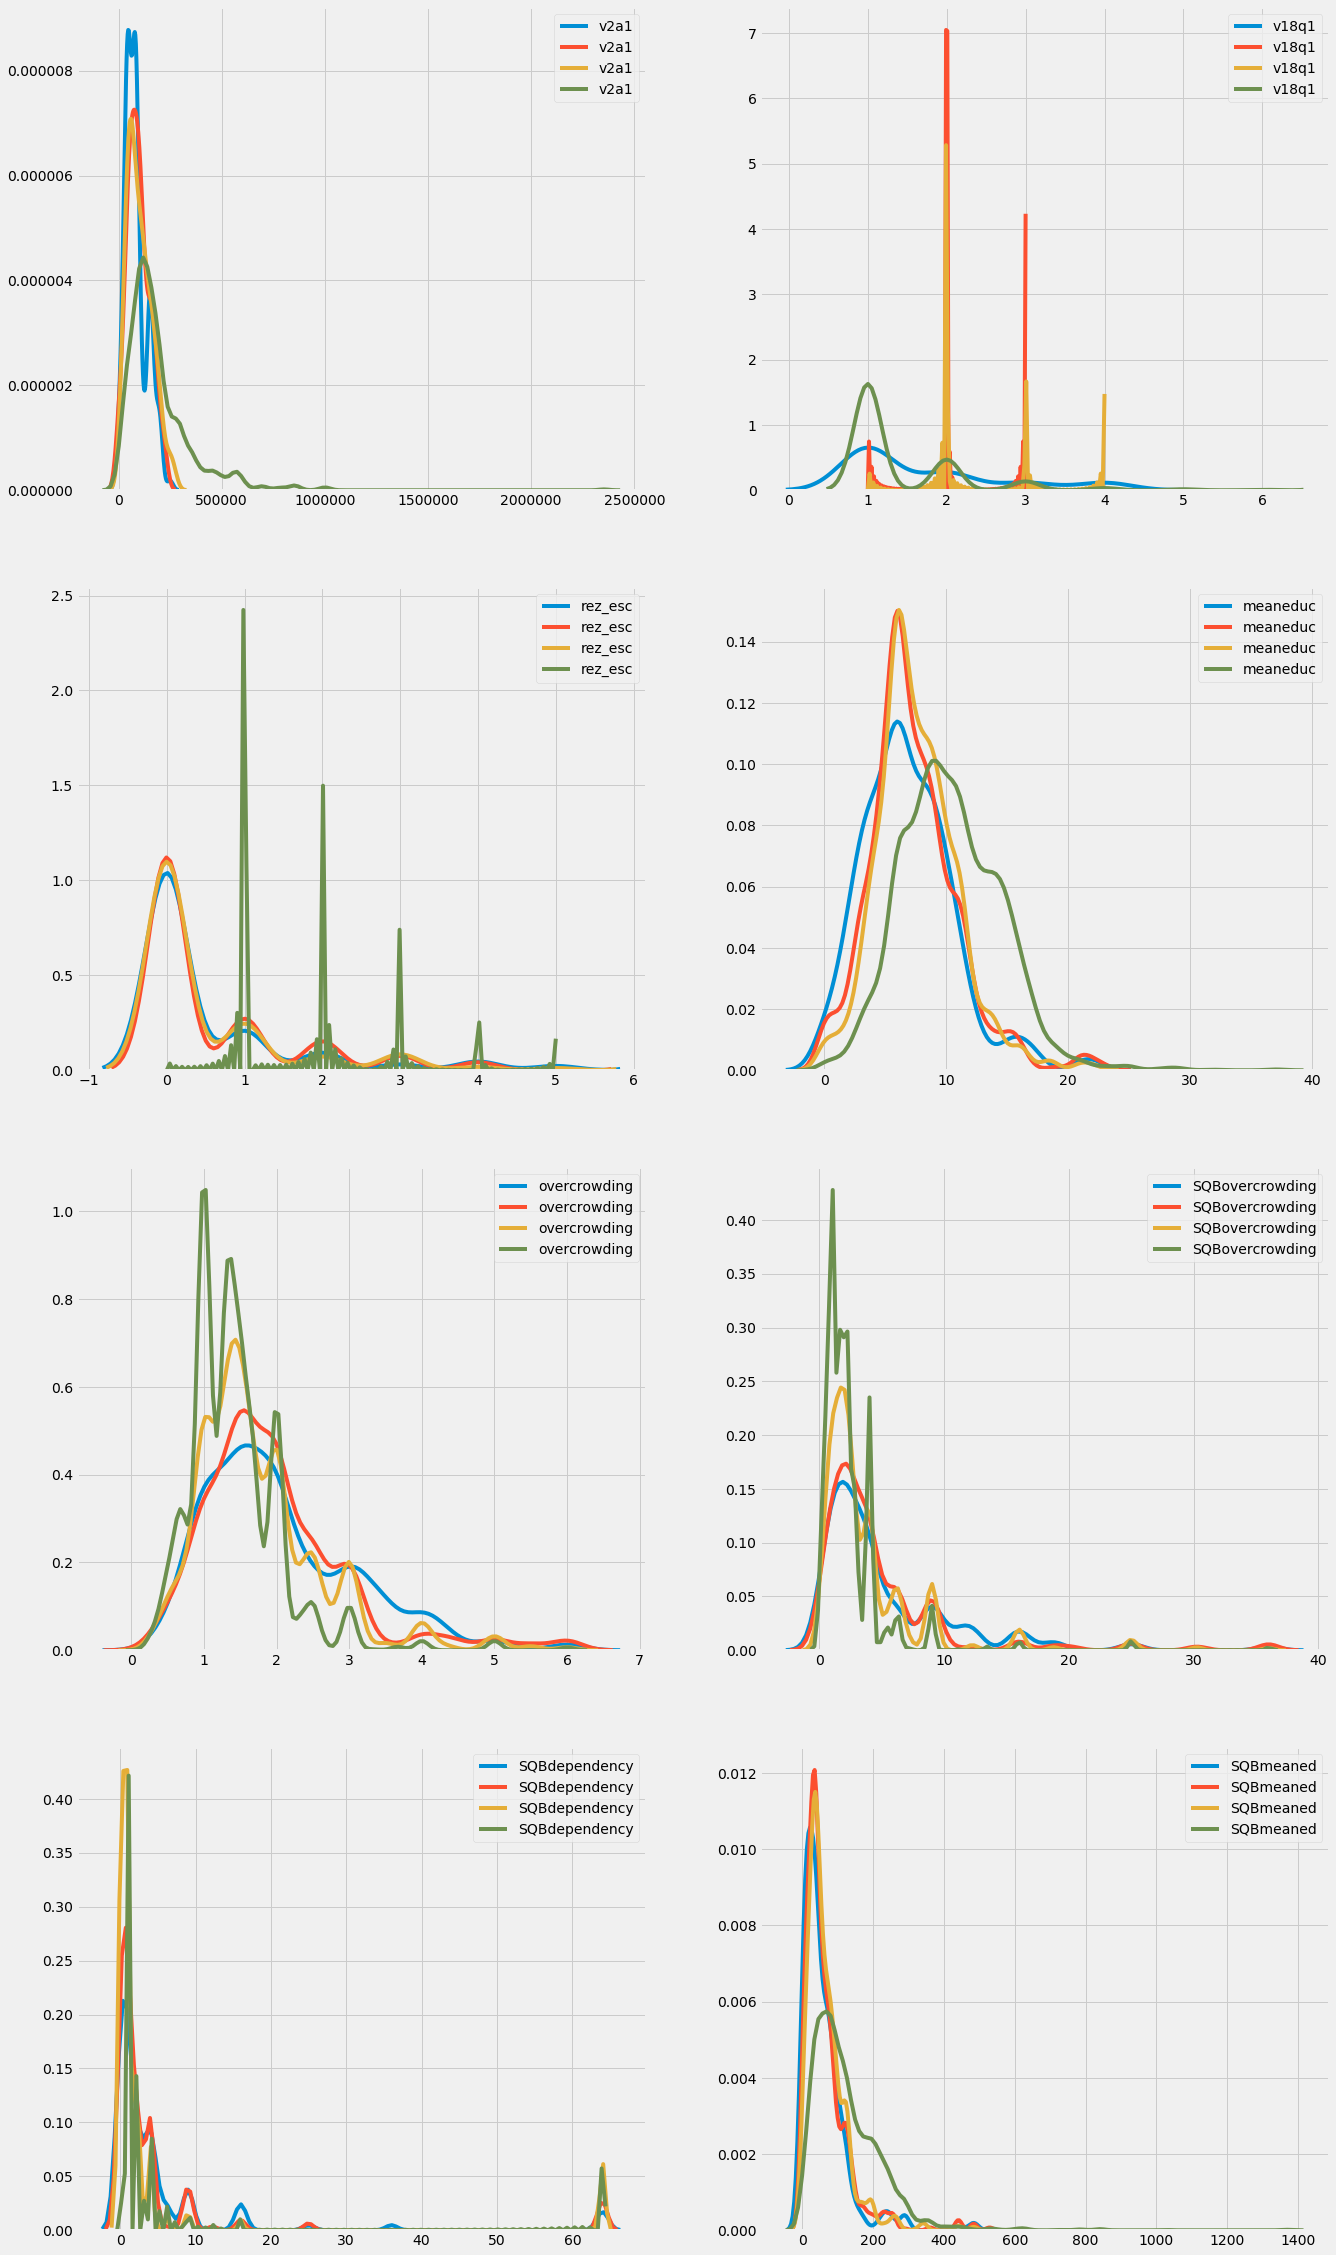

In [19]:
plt.figure(figsize = (20, 16))
plt.style.use('fivethirtyeight')

for i, col in enumerate(train.select_dtypes(np.float)):
    ax = plt.subplot(4, 2, i + 1)
    
    for poverty_level, c in colors.items():
        sns.kdeplot(train.loc[train['Target']== poverty_level , col]) 
plt.subplots_adjust(top = 2)


In [22]:
## Lets have a look on object columns

In [23]:
train.select_dtypes(object).head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


dependency, Dependency rate, calculated = (number of members of the household younger than 19 or older than 64)/(number of member of household between 19 and 64)

edjefe, years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

edjefa, years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

yes = 1 and no = 0

In [24]:
## Applying changes on train and test, data, replace no by 0 and yes by 1

In [25]:
mapping = {"yes":1, "no":2}

for df in [train, test]:
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)
    
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    
    

In [26]:
train.select_dtypes('object').head(2)

,Id,idhogar
0,ID_279628684,21eb7fcc1
1,ID_f29eb3ddd,0e5d7a658


The 3 other columns converted into float columns

In [27]:
train[['dependency', 'edjefe', 'edjefa']].describe()

,dependency,edjefe,edjefa
count,9557.000000,9557.000000,9557.000000
mean,1.515146,5.884064,4.200586
std,1.528456,4.522692,3.824210
min,0.166667,1.000000,1.000000
25%,0.500000,2.000000,2.000000
50%,1.000000,6.000000,2.000000
75%,2.000000,9.000000,6.000000
max,8.000000,21.000000,21.000000


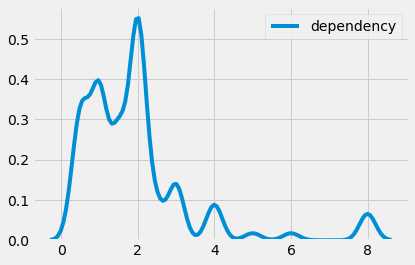

In [28]:
sns.kdeplot(train.loc[train['Target'] == 1, 'dependency'])

In [29]:
## Lets join the train_test set and seperate them later on 


In [30]:
## Add null to target variable

test['Target'] = np.nan
data = train.append(test, ignore_index=True)

## Feature Engineering


Impute the missing data

In [31]:
numeric = data.select_dtypes(exclude='object')
data.isnull().sum().sort_values(ascending=False).head(8)

rez_esc       27581
v18q1         25468
v2a1          24263
Target        23856
meaneduc         36
SQBmeaned        36
epared3           0
sanitario2        0
dtype: int64

In [32]:
data.select_dtypes(exclude='object').columns

Index(['v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'v18q1',
       'r4h1', 'r4h2',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=141)

In [33]:
## Lets explote the head of the th ehousehold column i.e. "parentesco1"

In [34]:
data['parentesco1'].value_counts()

0    23106
1    10307
Name: parentesco1, dtype: int64

1 indicates if the person is head of the household, 0 indicates he is not the head of the household

In [35]:
# Heads of house hold
heads = data.loc[data['parentesco1']==1].copy()

In [36]:
heads.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,2.0,10.0,2.0,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8.0,12.0,2.0,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4.0
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8.0,2.0,11.0,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4.0


Text(0, 0.5, 'Count')

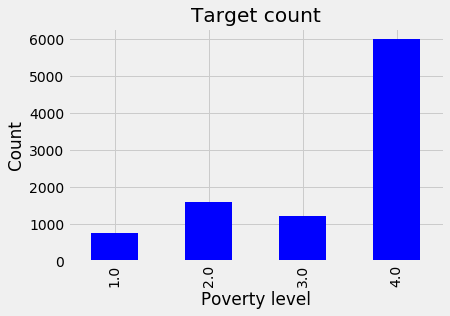

In [37]:
## label counts for target variable

label_counts = data['Target'].value_counts().sort_index()

label_counts.plot(kind='bar', color='b')
plt.title('Target count')
plt.xlabel('Poverty level')
plt.ylabel('Count')

In [39]:
## Distribution of target variable when head of family is present
heads = data.loc[data['parentesco1']==1].copy()

In [40]:
## Labels for training
train_labels = data.loc[(data['Target'].notnull()) & (data['parentesco1']==1), ['Target', 'idhogar']]

In [43]:
train_labels.head()

## idhogar - this is a unique identifier for each household. 
##This can be used to create household-wide features, etc.
##All rows in a given household will have a matching value for this identifier.

,Target,idhogar
0,4.0,21eb7fcc1
1,4.0,0e5d7a658
2,4.0,2c7317ea8
5,4.0,2b58d945f
8,4.0,d6dae86b7


Text(0.5, 1.0, 'Poverty breakdown when head of family is present')

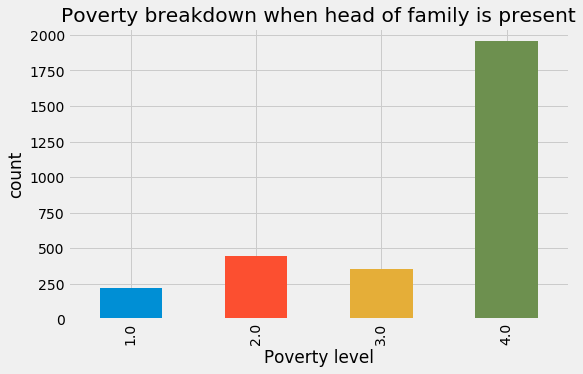

In [47]:
## Value count of target
train_labels['Target'].value_counts().sort_index().plot(kind='bar', figsize=(8,5))
plt.xlabel('Poverty level')
plt.ylabel('count')
plt.title('Poverty breakdown when head of family is present')


#### The presence of head of family does not impact the poverty level

The classes are heavely imbalance, the metric of measurement is f1 score, it would be very difficult to explote poverty ==1
becasuse of less exposure, one method to deal with class imbalance is oversampling.

### Identifying errors and correcting them

In [54]:
## Groupby household and findout the unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique()==1)


In [56]:
not_equal = all_equal[all_equal != True]

In [58]:
len(not_equal)

85

In [63]:
## lets look at a example
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


Here we see the unique household number represents different type of targets, which is against the documentation

Lets investigate the families without household

In [78]:
households_head = train.groupby('idhogar')['parentesco1'].sum()

# Findhousehold without a head
household_no_head = train.loc[train['idhogar'].isin(households_head[households_head==0].index), :]

In [79]:
household_no_head.shape

(23, 143)

In [82]:
print(f'There are {household_no_head.idhogar.nunique()} households without a head')

There are 15 households without a head


In [77]:
households_head.value_counts()

1    2973
0      15
Name: parentesco1, dtype: int64

### Family Without household head

We will investigate this in next section